## Selecting the Best Model:

Of core importance is the following question: if our estimator is underperforming, how
should we move forward? There are several possible answers:
    
- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each sample

The answer to this question is often counterintuitive. In particular, sometimes using a
more complicated model will give worse results, and adding more training samples
may not improve your results! 

#### The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

## The Bias-Variance Trade-Off:

- The model on the left attempts to find a straight-line fit through the data. Because the
data are intrinsically more complicated than a straight line, the straight-line model
will never be able to describe this dataset well. Such a model is said to underfit the
data; that is, it does not have enough model flexibility to suitably account for all the
features in the data. Another way of saying this is that the model has high bias.


- The model on the right attempts to fit a high-order polynomial through the data.
Here the model fit has enough flexibility to nearly perfectly account for the fine fea‐
tures in the data, but even though it very accurately describes the training data, its
precise form seems to be more reflective of the particular noise properties of the data
rather than the intrinsic properties of whatever process generated that data. Such a
model is said to overfit the data; that is, it has so much model flexibility that the
model ends up accounting for random errors as well as the underlying data distribu‐
tion. Another way of saying this is that the model has high variance.

## Validation Curves in Scikit-Learn:

In [94]:
# Importing Libraries:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
%matplotlib inline

In [45]:
# Defining a PolynomialRegression function:

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [7]:
# Defining a function for make_data:

def make_data(N, err = 1.0, rseed = 1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y = y + err * rng.randn(N)
    return X, y

In [8]:
# Making a data with make_data function:

X, y = make_data(40)

In [32]:
# Generating X_test segment:

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

In [33]:
# Mitko learning code to better understand what is going on:

type(X_test)

numpy.ndarray

array([-0.08797595])

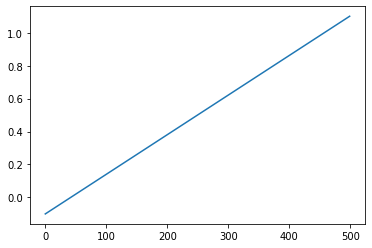

In [41]:
# Mitko learning code to better understand what is going on:

plt.plot(X_test)
X_test[5]#[0]

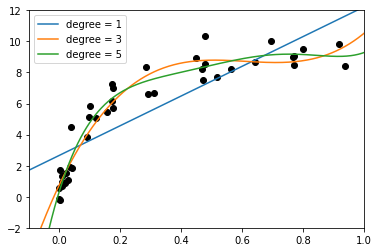

In [66]:
# Visualizing the data along with polynomial fits of several degrees:

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree = {0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best')

C:\Users\Mitko\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Text(0, 0.5, 'Score')

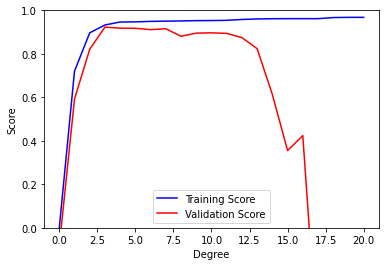

In [73]:
# Visualizing the validation curve for this particular data and model:

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv = 7)

plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'Training Score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'Validation Score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('Degree')
plt.ylabel('Score')

- From the validation curve, we can read off that the optimal trade-off between bias
and variance is found for a third-order polynomial, we can compute and display this
fit over the original data as follows 

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

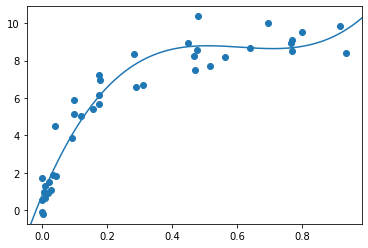

In [83]:
# Visualizing the third-order polynomial:

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

## Learning Curves:

In [84]:
# Generating new dataset factor x5:

X2, y2 = make_data(200)

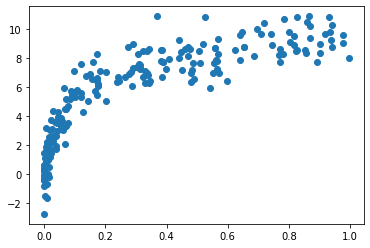

In [88]:
# Vizualizing the new dataset:

plt.scatter(X2.ravel(), y2)

C:\Users\Mitko\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Text(0, 0.5, 'Score')

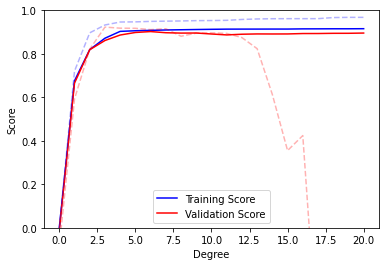

In [90]:
# Visualizing the validation curve for new dataset and compared with the old one:

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv = 7)

plt.plot(degree, np.median(train_score2, 1), color = 'blue', label = 'Training Score')
plt.plot(degree, np.median(val_score2, 1), color = 'red', label = 'Validation Score')
plt.plot(degree, np.median(train_score, 1), color = 'blue', alpha = 0.3, linestyle = 'dashed')
plt.plot(degree, np.median(val_score, 1), color = 'red', alpha = 0.3, linestyle = 'dashed')
plt.legend(loc = 'lower center')
plt.ylim(0, 1)
plt.xlabel('Degree')
plt.ylabel('Score')

## Learing Curves in Scikit-Learn:

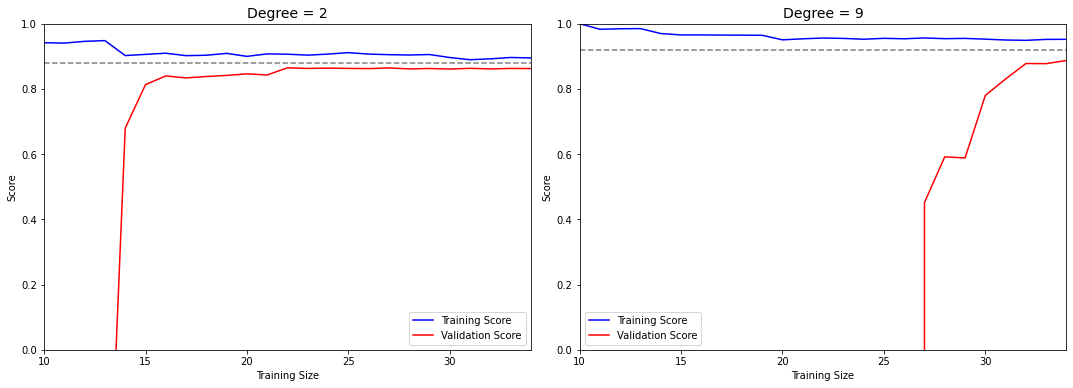

In [96]:
# Visualizing learning curve for polynomial of dergee 2 and 9:

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv = 7, train_sizes = np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', label = 'Training Score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', label = 'Validation Score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color = 'gray', linestyle = 'dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Training Size')
    ax[i].set_ylabel('Score')
    ax[i].set_title('Degree = {0}'.format(degree), size = 14)
    ax[i].legend(loc = 'best')

## Validation in Practice: Grid Search:

In [98]:
# Importing Libraries:

from sklearn.model_selection import GridSearchCV

In [107]:
# Creating the Hyperspace for optimization:

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

In [108]:
# Buidling a Grid Search model object:

grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

In [109]:
# Making a data with make_data function:

X, y = make_data(200)

In [110]:
# Training the model:

grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [111]:
# Printing the best estimator:

grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

In [112]:
# Assigin a variable to the best etimator:

model = grid.best_estimator_

(-0.04973262966595453,
 1.0443855107802196,
 -3.4515234846001435,
 11.583433979485)

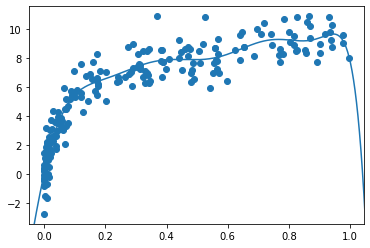

In [113]:
# Visualizing the third-order polynomial:

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)